# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import joblib
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [2]:
df = pd.read_csv("heart.csv")

# Analysing the dataset

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Removing duplicate items from dataset-

In [5]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no null value found

Finding correlation between the features and target-

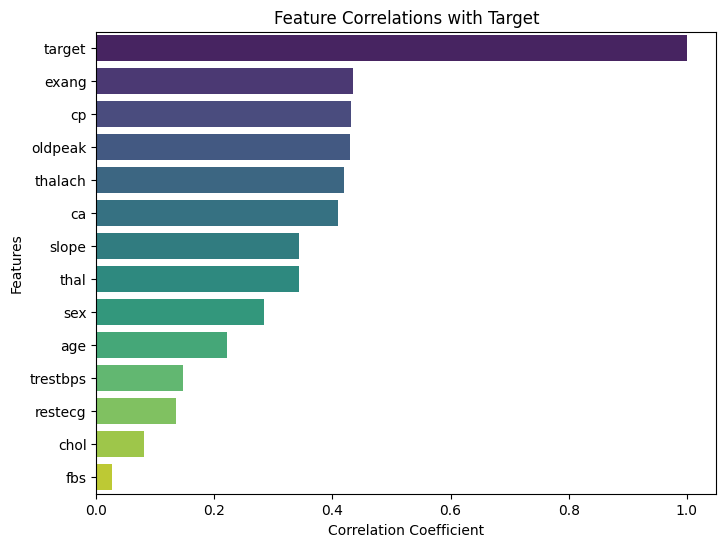

In [7]:
corr_matrix = df.corr()

target_correlations = df.corr()["target"].abs().sort_values(ascending=False)

df_target_corr = pd.DataFrame(target_correlations).reset_index()
df_target_corr.columns = ['Feature', 'Correlation']

plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation', y='Feature', data=df_target_corr, palette='viridis')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

fbs has the least correlation with target

Analysing the 'sex' feature-

Number of males are 206 and Number of females are 96


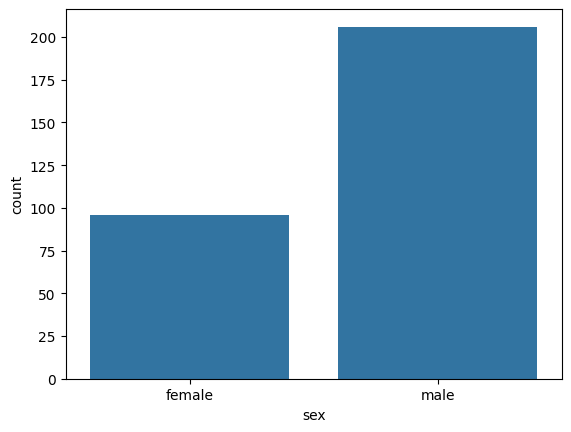

In [8]:
x = df.sex.value_counts()
print(f'Number of males are {x[1]} and Number of females are {x[0]}')
p = sns.countplot(data=df, x="sex")
p.set_xticklabels(['female', 'male'])
plt.show()

Analysing the'cp' feature-

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


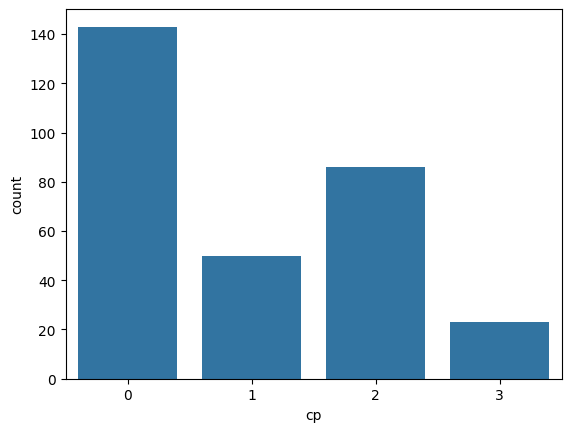

In [9]:
x=(df.cp.value_counts())
print(x)
p=sns.countplot(data=df , x="cp")


plt.show()

Analysing the age feature-

<Figure size 800x1600 with 0 Axes>

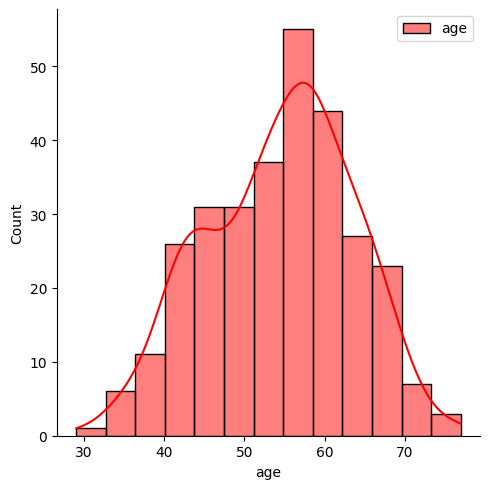

In [10]:
plt.figure(figsize=(8,16))
sns.displot(df.age,color='red',label='age',kde=True)
plt.legend()

age group 50-60 has the highest probability of a heart disease

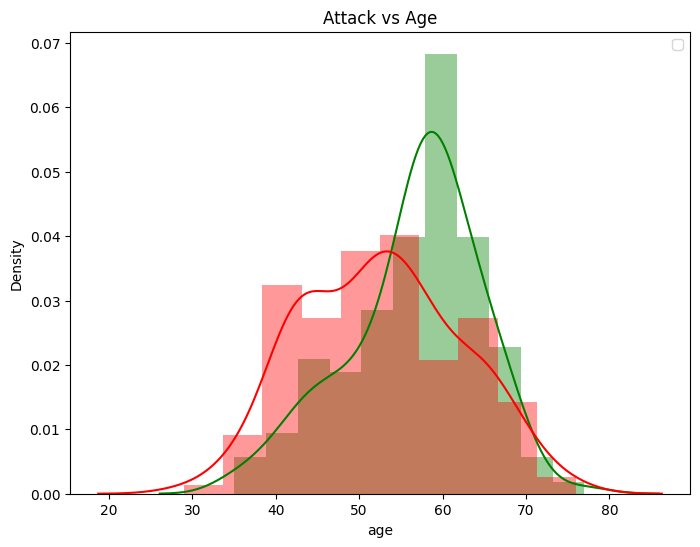

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['target']==0]['age'],color='green',kde=True)
sns.distplot(df[df['target']==1]['age'],color='red',kde=True)
plt.title("Attack vs Age")
plt.legend()

Analysing  the 'resting blood pressure ' feature

<Figure size 1000x1000 with 0 Axes>

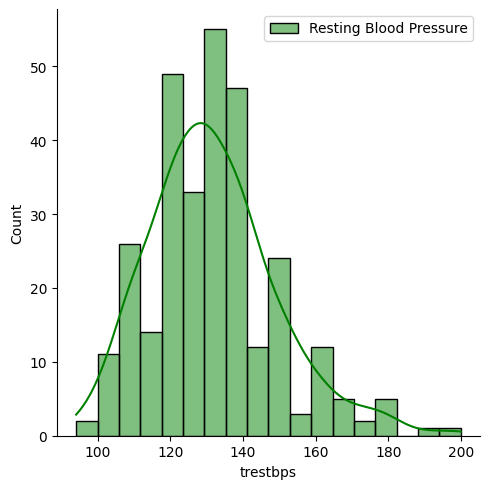

In [12]:
plt.figure(figsize=(10,10))
sns.displot(df.trestbps,color='green',label='Resting Blood Pressure',kde=True)
plt.legend()

Analysing Attack vs cholestrol-

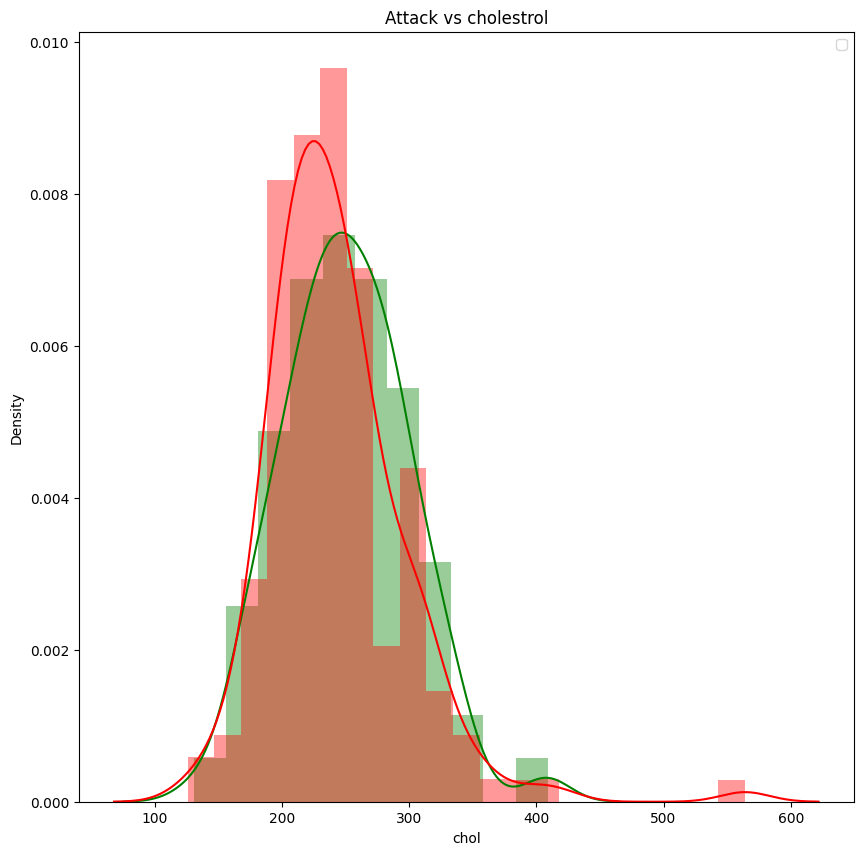

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target']==0]['chol'],color='green',kde=True)
sns.distplot(df[df['target']==1]['chol'],color='red',kde=True)
plt.title("Attack vs cholestrol")
plt.legend()

# seperating feature and target

In [14]:
X= df.drop("target",axis=1)
y= df["target"]

# train test split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

# Scaling the data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Fitting

K-MEANS -

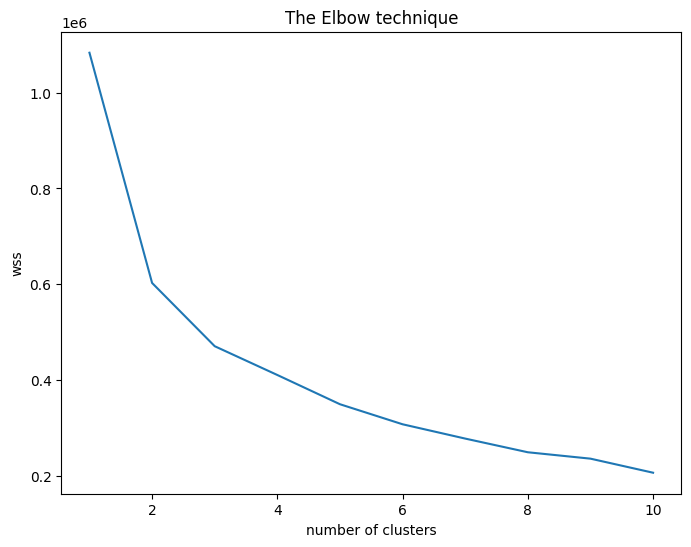

optimum number of clusters is 2
Maximum accuracy: 57.62
Best random_state: 2
The accuracy score achieved using KMeans with the best random_state is: 57.62 %


In [24]:
from sklearn.cluster import KMeans
wss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
 kmeans.fit(X)
 wss.append(kmeans.inertia_)

f3,ax=plt.subplots(figsize=(8,6))
plt.plot(range(1,11),wss)
plt.title('The Elbow technique')
plt.xlabel('number of clusters')
plt.ylabel('wss')
plt.show()
print(f"optimum number of clusters is 2")
N=2
max_accuracy = 0
best_random_state = 0

for random_state in range(100):
    kmeans = KMeans(init='k-means++', n_clusters=N, random_state=random_state, n_init=10, max_iter=360)
    kmeans.fit(X)
    labels = kmeans.labels_
    current_accuracy = round(accuracy_score(labels, y) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

print("Maximum accuracy:", max_accuracy)
print("Best random_state:", best_random_state)

kmeans = KMeans(init='k-means++', n_clusters=N, random_state=best_random_state, n_init=10, max_iter=360)
kmeans.fit(X)
labels = kmeans.labels_

accuracy_kmeans = round(accuracy_score(labels, y) * 100, 2)
print("The accuracy score achieved using KMeans with the best random_state is: " + str(accuracy_kmeans) + " %")


accuracy= 57.62%

LOGISTIC REGRESSION -

In [25]:
from sklearn.linear_model import LogisticRegression

max_accuracy = 0
best_random_state = 0

for random_state in range(100):
    log_reg = LogisticRegression(random_state=random_state)
    log_reg.fit(X_train, y_train)
    Y_pred_log_reg = log_reg.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_log_reg, y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

print("Maximum accuracy:", max_accuracy)
print("Best random_state:", best_random_state)

log_reg = LogisticRegression(random_state=best_random_state)
log_reg.fit(X_train, y_train)
Y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = round(accuracy_score(Y_pred_log_reg, y_test) * 100, 2)
print("The accuracy score achieved using Logistic Regression with the best random_state is: " + str(accuracy_log_reg) + " %")


Maximum accuracy: 90.32
Best random_state: 0
The accuracy score achieved using Logistic Regression with the best random_state is: 90.32 %


accuracy=90.32%

RANDOM FOREST CLASSIFIER -

In [26]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
best_random_state = 0

for random_state in range(200):
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

print(f"Maximum accuracy: {max_accuracy}%")
print(f"Best random state: {best_random_state}")

best_rf = RandomForestClassifier(random_state=best_random_state)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

final_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
print(f"The final accuracy score achieved using Random Forest is: {final_accuracy}%")



Maximum accuracy: 93.55%
Best random state: 15
The final accuracy score achieved using Random Forest is: 93.55%


accuracy=93.55%  (highest accuracy)

ADA BOOST CLASSIFIER -

In [27]:
from sklearn.ensemble import AdaBoostClassifier

max_accuracy = 0
best_random_state = 0

for random_state in range(100):
    ada = AdaBoostClassifier(random_state=random_state)
    ada.fit(X_train, y_train)
    Y_pred_ada = ada.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_ada, y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

print("Maximum accuracy:", max_accuracy)
print("Best random_state:", best_random_state)

ada = AdaBoostClassifier(random_state=best_random_state)
ada.fit(X_train, y_train)
Y_pred_ada = ada.predict(X_test)

accuracy_ada = round(accuracy_score(Y_pred_ada, y_test) * 100, 2)
print("The accuracy score achieved using AdaBoost with the best random_state is: " + str(accuracy_ada) + " %")


Maximum accuracy: 87.1
Best random_state: 0
The accuracy score achieved using AdaBoost with the best random_state is: 87.1 %


accuracy= 83.87%

SUPPORT VECTOR CLASSIFICATION -

In [28]:
from sklearn.svm import SVC

max_accuracy = 0
best_random_state = 0

for random_state in range(100):
    svm = SVC(random_state=random_state)
    svm.fit(X_train, y_train)
    Y_pred_svm = svm.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_svm, y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

print("Maximum accuracy:", max_accuracy)
print("Best random_state:", best_random_state)

svm = SVC(random_state=best_random_state)
svm.fit(X_train, y_train)
Y_pred_svm = svm.predict(X_test)

accuracy_svm = round(accuracy_score(Y_pred_svm, y_test) * 100, 2)
print("The accuracy score achieved using SVM with the best random_state is: " + str(accuracy_svm) + " %")


Maximum accuracy: 87.1
Best random_state: 0
The accuracy score achieved using SVM with the best random_state is: 87.1 %


accuracy=87.1%

# Preparing the training and testing files

In [29]:
# Convert NumPy arrays to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.Series(y_train, name='target_column')
y_test_df = pd.Series(y_test, name='target_column')

# Combine the feature and target DataFrames for train and test sets
train_data = pd.concat([X_train_df, y_train_df], axis=1)
test_data = pd.concat([X_test_df, y_test_df], axis=1)

# Save the DataFrames to CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Training and testing sets have been saved to 'train_data.csv' and 'test_data.csv'.")



Training and testing sets have been saved to 'train_data.csv' and 'test_data.csv'.


# Saving the model to a file

In [ ]:
joblib.dump(best_rf, "Random_Forest.joblib")
joblib.dump(scaler, "Scaler_Model.joblib")
print("Model and scaler have been saved.")


Model and scaler have been saved.
